In [1]:
import math
import sklearn
import pandas as pd
import numpy as np
import pylab as pl
from sklearn import preprocessing
import seaborn as sns
from matplotlib.colors import ListedColormap
df = pd.read_excel('preliminary.xlsm')
print(df)
characteristic_table = [[['KNN'], [0],[0],[0]],    #матрица под все средние величины
                        [['DT'], [0],[0],[0]],
                        [['NB'], [0],[0],[0]],
                        [['RF'], [0],[0],[0]],
                        [['LR'], [0],[0],[0]]]
method_id = 0
every_question_base = []                           #ответы на все вопросы для усатого ящика
j = 0
for i in range (4, 34): 
    every_question_base.append(np.array(df.iloc[:, i]))
    print(every_question_base[j])
    print('\n')
    j+1

           Отметка времени                        1. ФИО  \
0  2021-11-30 11:52:20.070   Устарханов Артём Уллубиевич   
1  2021-12-01 15:17:07.723      Зенченко Егор Андреевич    
2  2021-12-10 19:28:14.219     Васильев Максим Сергеевич   
3  2021-11-28 12:03:27.036     Гувалов Руслан Гумбатович   
4  2021-11-30 11:09:08.694  Устиновская Марина Андреевна   
..                     ...                           ...   
85 2021-11-30 11:55:47.477  Дрямов Валерий Александрович   
86 2021-11-30 11:44:55.874          Янин Артем Сергеевич   
87 2021-11-30 12:44:39.850      Романов Кирилл Романович   
88 2021-11-30 11:42:23.107   Рахманова Дарина Максимовна   
89 2021-12-01 15:19:58.275      Попков Никита Алексеевич   

   2. Ваше направление обучения (полное название)  \
0                                             МОС   
1                                             МОС   
2                                             ПМФ   
3                                             ИСТ   
4             

фильтр на баллы (не использовал)

In [27]:
Array_Summary_OF_Three = np.array(df.iloc[:, 3])
n = 0
n = len(np.array(df.iloc[:, 3]))
print("THE NUMBER OF PEOPLE = ", n)
print(Array_Summary_OF_Three)
Array_OF_Names = np.array(df.iloc[:, 1])
print(Array_OF_Names)

THE NUMBER OF PEOPLE =  90
[213 168 164 190 264 181 219 225 204 246 240 196 211 220 265 199 238 210
 246 222 224 222 210 265 198 174 188 175 207 256 182 208 235 230 228 259
 202 246 189 250 240 187 210 221 163 160 164 214 261 184 233 246 174 236
 180 222 270 168 219 168 224 169 205 175 180 216 253 169 258 203 265 161
 178 177 156 144 156 154 157 145 146 156 140 158 150 213 214 213 244 204]
['Устарханов Артём Уллубиевич' 'Зенченко Егор Андреевич '
 'Васильев Максим Сергеевич' 'Гувалов Руслан Гумбатович'
 'Устиновская Марина Андреевна' 'Горбаченко Юлия Анатольевна '
 'Панафидин Михаил Николаевич' 'Омельченко Олеся'
 'Олейник Алина Александровна' 'Зверяев Виталий Михайлович'
 'Пономарев Александр Сергеевич' 'Савельев Андрей Леонидович'
 'Мыльников Иван Николаевич' 'Лиджиев Владимир Мингиянович '
 'Фролова Юлия Алексеевна' 'Агапченко Олег Андреевич'
 'Резанов Кирилл Владимирович' 'Астахов Данила Александрович '
 'Ракчеев Никита Сергеевич' 'Чернышов Олег Сергеевич'
 'Крайнев Никита Евгеньев

НОРМАЛИЗАЦИЯ (не использовал)

In [90]:
# scaler = preprocessing.MinMaxScaler()
# names = df.iloc[0, 4:32]
# print(df.iloc[:, 4:32]) 
# d = scaler.fit_transform(df.iloc[:, 4:32])
# scaled_df = pd.DataFrame(d, columns=names)
# print(scaled_df)

    4. Часто ли вы проводите время за компьютером?  \
0                                               10   
1                                                8   
2                                                8   
3                                                3   
4                                               10   
..                                             ...   
85                                              10   
86                                               9   
87                                               7   
88                                              10   
89                                               8   

    5. Часто ли вы читаете книги?  6. Нравится ли вам решать головоломки?  \
0                               3                                       6   
1                               5                                       6   
2                               5                                       6   
3                               2          

CONFUSION MATRIX

In [2]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

def confusion_matrix_visualization(fully_cf_matrix):
    knn_matrix = sns.heatmap(fully_cf_matrix, annot=True, cmap='Blues')

    knn_matrix.set_title('General number of each criteria\n\n');
    knn_matrix.set_xlabel('\nPredicted Values')
    knn_matrix.set_ylabel('Actual Values ')

    ## Ticket labels - List must be in alphabetical order
    knn_matrix.xaxis.set_ticklabels(['physics','maths'])
    knn_matrix.yaxis.set_ticklabels(['physics','maths'])

    ## Display the visualization of the Confusion Matrix.
    plt.show(knn_matrix)


CALCULATING ACCURACY, SENSITIVITY, SPECIFCITY AND EFFECTIVITY

In [3]:

def acc(cm):
    total=sum(sum(cm))
    accuracy=(cm[0,0]+cm[1,1])/total
    return accuracy

def sens(cm): 
    sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
    return sensitivity

def spec(cm):
    specificity = cm[1,1]/(cm[1,0]+cm[1,1])
    return specificity

def effect(cm):
    effectivity = math.sqrt(sens(cm)*spec(cm))
    return effectivity


MAIN SETTINGS FOR CLASSIFICATIONS

In [4]:
n = 5000
x = df.values[:, 4:32]
x=x.astype('int')                                                                           #приведение типов к int 
y = df.values[:, 34]
y=y.astype('int')
sens_sum = 0
spec_sum = 0
effect_sum = 0
from sklearn.model_selection import train_test_split                                     #библиотека деления на выборки

NEAREST NEIGHBOURS 

[[0, 0], [0, 0]]
[[4 3]
 [5 6]]
[[ 7  7]
 [ 8 14]]
[[ 8 13]
 [11 22]]
[[10 18]
 [14 30]]
[[14 21]
 [18 37]]
[[16 26]
 [18 48]]
[[17 32]
 [22 55]]
[[20 36]
 [24 64]]
[[21 42]
 [26 73]]
[[24 46]
 [29 81]]
[[26 51]
 [30 91]]
[[28 56]
 [35 97]]
[[ 31  60]
 [ 37 106]]
[[ 34  64]
 [ 42 112]]
[[ 37  68]
 [ 44 121]]
[[ 38  74]
 [ 47 129]]
[[ 38  81]
 [ 52 135]]
[[ 41  85]
 [ 56 142]]
[[ 43  90]
 [ 60 149]]
[[ 44  96]
 [ 61 159]]
[[ 47 100]
 [ 65 166]]
[[ 49 105]
 [ 67 175]]
[[ 50 111]
 [ 73 180]]
[[ 50 118]
 [ 75 189]]
[[ 52 123]
 [ 80 195]]
[[ 53 129]
 [ 84 202]]
[[ 56 133]
 [ 88 209]]
[[ 58 138]
 [ 92 216]]
[[ 61 142]
 [ 96 223]]
[[ 62 148]
 [ 98 232]]
[[ 65 152]
 [100 241]]
[[ 69 155]
 [104 248]]
[[ 70 161]
 [106 257]]
[[ 72 166]
 [108 266]]
[[ 73 172]
 [113 272]]
[[ 75 177]
 [116 280]]
[[ 76 183]
 [118 289]]
[[ 79 187]
 [121 297]]
[[ 82 191]
 [123 306]]
[[ 84 196]
 [126 314]]
[[ 87 200]
 [130 321]]
[[ 89 205]
 [134 328]]
[[ 92 209]
 [138 335]]
[[ 95 213]
 [142 342]]
[[ 98 217]
 [145 350]]


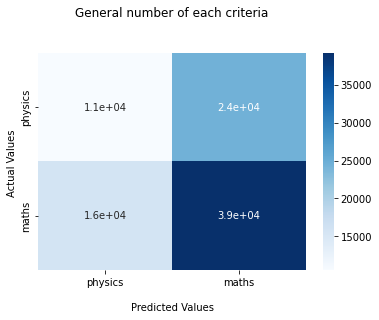

In [5]:
from sklearn.neighbors import KNeighborsClassifier
method_id = 0
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier(n_neighbors = 3, metric = 'euclidean', weights = 'uniform')   #задание критериев классификатора
fully_cf_matrix = [[0, 0], [0, 0]]
for i in range(0, n):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, stratify = y)  #разделение данных на тест и обучающую выборку
    knn.fit(x_train, y_train)                                                                #обучение
    predicted = knn.predict(x_test)                                                          #предсказание для тест выборки
    cf_matrix = confusion_matrix(y_test, predicted)                                          #матрица запутанности от предсказанного и каноничного
    print(fully_cf_matrix)
    fully_cf_matrix = fully_cf_matrix + cf_matrix                                            #полная матрица общего количества распределенных студентов
    sens_sum = sens_sum + sens(cf_matrix)                                                    #суммарные чувствительность
    spec_sum = spec_sum + spec(cf_matrix)                                                    #специфичность
    effect_sum = effect_sum + effect(cf_matrix)                                              #эффективность
sens_sum = sens_sum/n                                                                        #эти же показатели средние 
spec_sum = spec_sum/n
effect_sum = effect_sum/n
print('Average knn specisitivity, sensitivity and effectivity', sens_sum, spec_sum, effect_sum)
confusion_matrix_visualization(fully_cf_matrix)
characteristic_table[method_id][1] = sens_sum                                                #заполнение матрицы с величинами (под каждый метод аналогично)
characteristic_table[method_id][2] = spec_sum
characteristic_table[method_id][3] = effect_sum

DECISION TREES

[[4 3]
 [4 7]]
[[2 5]
 [3 8]]
[[5 2]
 [4 7]]
[[4 3]
 [3 8]]
[[3 4]
 [3 8]]
[[3 4]
 [3 8]]
[[3 4]
 [4 7]]
[[3 4]
 [3 8]]
[[4 3]
 [3 8]]
[[1 6]
 [4 7]]
[[3 4]
 [2 9]]
[[3 4]
 [2 9]]
[[3 4]
 [6 5]]
[[4 3]
 [5 6]]
[[ 3  4]
 [ 1 10]]
[[6 1]
 [3 8]]
[[3 4]
 [2 9]]
[[4 3]
 [6 5]]
[[5 2]
 [7 4]]
[[2 5]
 [5 6]]
[[6 1]
 [8 3]]
[[2 5]
 [7 4]]
[[4 3]
 [4 7]]
[[3 4]
 [2 9]]
[[1 6]
 [2 9]]
[[4 3]
 [4 7]]
[[4 3]
 [5 6]]
[[3 4]
 [3 8]]
[[3 4]
 [2 9]]
[[4 3]
 [6 5]]
[[5 2]
 [5 6]]
[[3 4]
 [7 4]]
[[5 2]
 [2 9]]
[[3 4]
 [5 6]]
[[1 6]
 [2 9]]
[[2 5]
 [3 8]]
[[2 5]
 [5 6]]
[[4 3]
 [4 7]]
[[1 6]
 [4 7]]
[[2 5]
 [5 6]]
[[2 5]
 [6 5]]
[[2 5]
 [5 6]]
[[2 5]
 [5 6]]
[[6 1]
 [5 6]]
[[3 4]
 [2 9]]
[[4 3]
 [6 5]]
[[2 5]
 [7 4]]
[[2 5]
 [4 7]]
[[1 6]
 [4 7]]
[[4 3]
 [4 7]]
[[ 4  3]
 [ 1 10]]
[[4 3]
 [5 6]]
[[4 3]
 [3 8]]
[[4 3]
 [4 7]]
[[3 4]
 [3 8]]
[[5 2]
 [7 4]]
[[3 4]
 [5 6]]
[[2 5]
 [6 5]]
[[3 4]
 [2 9]]
[[5 2]
 [7 4]]
[[2 5]
 [3 8]]
[[6 1]
 [2 9]]
[[1 6]
 [3 8]]
[[3 4]
 [4 7]]
[[3 4]
 [2 9]]
[[0 7]
 [5 6]]
[[

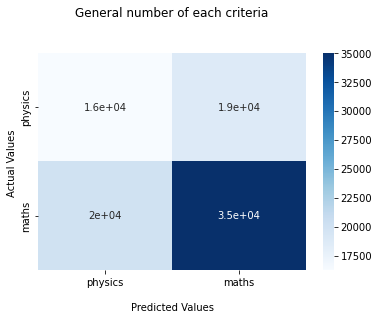

In [10]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion = "entropy", max_depth = 5)          #параметры классификатора, где max_depth - максимальный уровень рассмотрения ветвей 
method_id = 1
fully_dtc_cf_matrix = [[0, 0], [0, 0]]
for i in range(0, n):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, stratify = y)
    dtc.fit(x_train, y_train)
    dtc_predicted = dtc.predict(x_test) 
    dtc_cf_matrix = confusion_matrix(y_test, dtc_predicted)
    print(dtc_cf_matrix) 
    fully_dtc_cf_matrix = fully_dtc_cf_matrix + confusion_matrix(y_test, dtc_predicted) 
    sens_sum = sens_sum + sens(dtc_cf_matrix)
    spec_sum = spec_sum + spec(dtc_cf_matrix)
    effect_sum = effect_sum + effect(dtc_cf_matrix)
sens_sum = sens_sum/n
spec_sum = spec_sum/n
effect_sum = effect_sum/n
print('Average dtc specisitivity, sensitivity and effectivicity', sens_sum, spec_sum, effect_sum)
confusion_matrix_visualization(fully_dtc_cf_matrix)
characteristic_table[method_id][1] = sens_sum
characteristic_table[method_id][2] = spec_sum
characteristic_table[method_id][3] = effect_sum

VIZUALIZING OF TREE

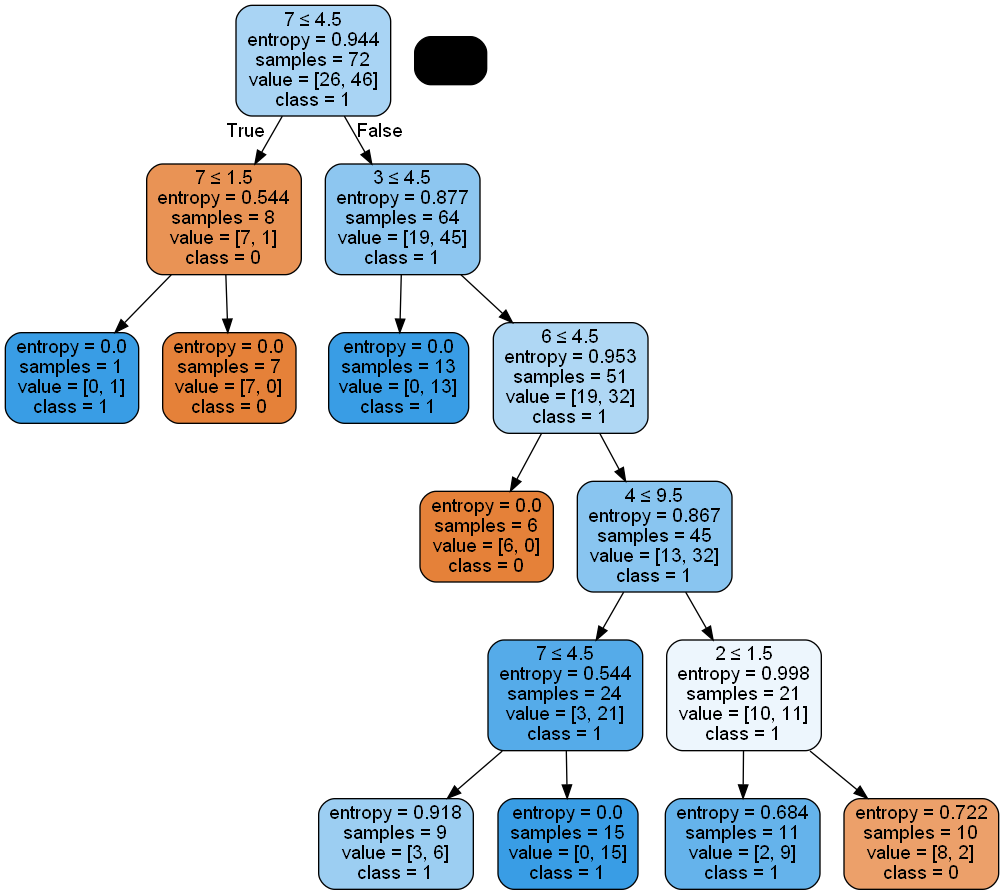

In [7]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

answer_cols = df.iloc[-1, 4:32]

dot_data = StringIO()
export_graphviz(dtc, out_file=dot_data, filled=True, rounded = True, special_characters=True, feature_names=answer_cols, class_names = ['0', '1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Students.png')
Image(graph.create_png())

NAIV BAYER 

[[5 2]
 [5 6]]
[[ 2  5]
 [ 1 10]]
[[6 1]
 [5 6]]
[[4 3]
 [3 8]]
[[4 3]
 [4 7]]
[[3 4]
 [5 6]]
[[ 2  5]
 [ 1 10]]
[[4 3]
 [5 6]]
[[4 3]
 [2 9]]
[[3 4]
 [2 9]]
[[3 4]
 [4 7]]
[[4 3]
 [5 6]]
[[2 5]
 [2 9]]
[[2 5]
 [3 8]]
[[3 4]
 [2 9]]
[[4 3]
 [4 7]]
[[5 2]
 [6 5]]
[[2 5]
 [2 9]]
[[1 6]
 [2 9]]
[[4 3]
 [2 9]]
[[ 3  4]
 [ 1 10]]
[[2 5]
 [2 9]]
[[3 4]
 [4 7]]
[[4 3]
 [5 6]]
[[3 4]
 [5 6]]
[[3 4]
 [3 8]]
[[5 2]
 [6 5]]
[[4 3]
 [5 6]]
[[5 2]
 [5 6]]
[[4 3]
 [3 8]]
[[5 2]
 [3 8]]
[[6 1]
 [4 7]]
[[4 3]
 [4 7]]
[[2 5]
 [2 9]]
[[ 2  5]
 [ 1 10]]
[[3 4]
 [4 7]]
[[ 5  2]
 [ 1 10]]
[[3 4]
 [3 8]]
[[4 3]
 [3 8]]
[[4 3]
 [4 7]]
[[7 0]
 [8 3]]
[[3 4]
 [2 9]]
[[2 5]
 [5 6]]
[[3 4]
 [5 6]]
[[3 4]
 [5 6]]
[[3 4]
 [4 7]]
[[3 4]
 [4 7]]
[[3 4]
 [5 6]]
[[3 4]
 [3 8]]
[[3 4]
 [2 9]]
[[5 2]
 [4 7]]
[[2 5]
 [5 6]]
[[4 3]
 [5 6]]
[[4 3]
 [2 9]]
[[4 3]
 [2 9]]
[[2 5]
 [3 8]]
[[3 4]
 [4 7]]
[[5 2]
 [4 7]]
[[ 4  3]
 [ 1 10]]
[[3 4]
 [3 8]]
[[4 3]
 [5 6]]
[[3 4]
 [4 7]]
[[3 4]
 [7 4]]
[[3 4]
 [3 8]]
[[2 5]
 [4 7]]
[

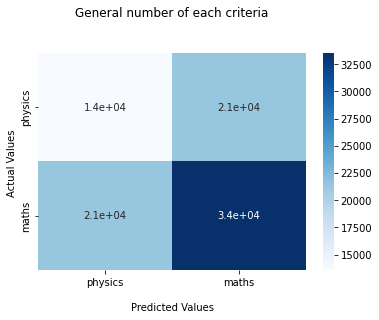

In [16]:
from sklearn.naive_bayes import GaussianNB
method_id = 2
fully_nb_cf_matrix = [[0, 0], [0, 0]]
for i in range(0, n):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, stratify = y)
    nb = GaussianNB()         
    nb.fit(x_train, y_train)
    nb_predicted = nb.predict(x_test) 
    nb_cf_matrix = confusion_matrix(y_test, nb_predicted) 
    print(nb_cf_matrix)
    fully_nb_cf_matrix = fully_nb_cf_matrix + confusion_matrix(y_test, dtc_predicted) 
    sens_sum = sens_sum + sens(nb_cf_matrix)
    spec_sum = spec_sum + spec(nb_cf_matrix)
    effect_sum = effect_sum + effect(nb_cf_matrix)
sens_sum = sens_sum/n
spec_sum = spec_sum/n
effect_sum = effect_sum/n
print('Average dtc specisitivity, sensitivity and effectivicity', sens_sum, spec_sum, effect_sum)
confusion_matrix_visualization(fully_nb_cf_matrix)
characteristic_table[method_id][1] = sens_sum
characteristic_table[method_id][2] = spec_sum
characteristic_table[method_id][3] = effect_sum

RANDOM FOREST (too slow)

[[3 4]
 [2 9]]
[[2 5]
 [3 8]]
[[3 4]
 [2 9]]
[[2 5]
 [2 9]]
[[2 5]
 [2 9]]
[[2 5]
 [3 8]]
[[2 5]
 [4 7]]
[[ 1  6]
 [ 0 11]]
[[2 5]
 [2 9]]
[[2 5]
 [4 7]]
[[2 5]
 [2 9]]
[[3 4]
 [6 5]]
[[ 2  5]
 [ 0 11]]
[[2 5]
 [3 8]]
[[2 5]
 [3 8]]
[[2 5]
 [3 8]]
[[1 6]
 [5 6]]
[[3 4]
 [5 6]]
[[4 3]
 [4 7]]
[[3 4]
 [2 9]]
[[1 6]
 [3 8]]
[[2 5]
 [5 6]]
[[2 5]
 [2 9]]
[[ 4  3]
 [ 0 11]]
[[ 3  4]
 [ 1 10]]
[[5 2]
 [4 7]]
[[ 2  5]
 [ 1 10]]
[[3 4]
 [4 7]]
[[2 5]
 [2 9]]
[[ 3  4]
 [ 1 10]]
[[1 6]
 [3 8]]
[[5 2]
 [3 8]]
[[1 6]
 [2 9]]
[[3 4]
 [4 7]]
[[1 6]
 [3 8]]
[[ 1  6]
 [ 1 10]]
[[2 5]
 [4 7]]
[[2 5]
 [2 9]]
[[3 4]
 [5 6]]
[[1 6]
 [3 8]]
[[2 5]
 [3 8]]
[[2 5]
 [2 9]]
[[3 4]
 [4 7]]
[[ 2  5]
 [ 1 10]]
[[1 6]
 [2 9]]
[[2 5]
 [3 8]]
[[1 6]
 [3 8]]
[[1 6]
 [4 7]]
[[ 1  6]
 [ 0 11]]
[[1 6]
 [3 8]]
[[ 0  7]
 [ 1 10]]
[[4 3]
 [2 9]]
[[3 4]
 [3 8]]
[[4 3]
 [3 8]]
[[3 4]
 [3 8]]
[[3 4]
 [2 9]]
[[0 7]
 [2 9]]
[[1 6]
 [2 9]]
[[2 5]
 [2 9]]
[[ 3  4]
 [ 1 10]]
[[2 5]
 [3 8]]
[[5 2]
 [3 8]]
[[ 1  6]
 [ 1 10]]
[[2 5]


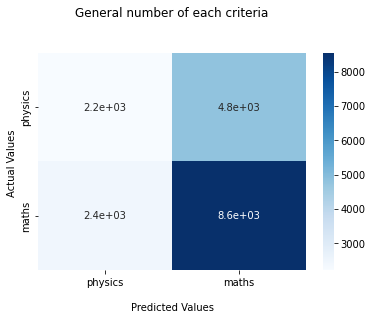

In [12]:
from sklearn.ensemble import RandomForestClassifier
method_id = 3
fully_rf_cf_matrix = [[0, 0], [0, 0]]
rf = RandomForestClassifier(n_estimators=100,
                            bootstrap = True,
                            max_features = 'sqrt')  
for i in range(0, 1000):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, stratify = y)       
    rf.fit(x_train, y_train)
    rf_predicted = rf.predict(x_test) 
    rf_cf_matrix = confusion_matrix(y_test, rf_predicted) 
    print(rf_cf_matrix)
    fully_rf_cf_matrix = fully_rf_cf_matrix + confusion_matrix(y_test, rf_predicted) 
    sens_sum = sens_sum + sens(rf_cf_matrix)
    spec_sum = spec_sum + spec(rf_cf_matrix)
    effect_sum = effect_sum + effect(rf_cf_matrix)
sens_sum = sens_sum/n
spec_sum = spec_sum/n
effect_sum = effect_sum/n
print('Average rf specisitivity, sensitivity and effectivicity', sens_sum, spec_sum, effect_sum)
confusion_matrix_visualization(fully_rf_cf_matrix)
characteristic_table[method_id][1] = sens_sum
characteristic_table[method_id][2] = spec_sum
characteristic_table[method_id][3] = effect_sum

LOGISTIC REGRESSION (which is not working cause of too large number of iterations)

c:\Conda\envs\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Conda\envs\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check

Average logreg specisitivity, sensitivity and effectivicity 0.00589838053588554 0.007212956379812977 0.006362734631712849


c:\Conda\envs\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


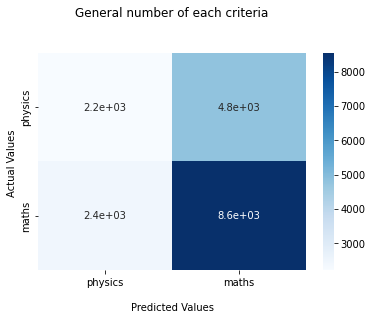

In [13]:
from sklearn.linear_model import LogisticRegression
method_id = 4
logreg = LogisticRegression()  
fully_logreg_cf_matrix = [[0, 0], [0, 0]]
for i in range(0, 50):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, stratify = y)       
    logreg.fit(x_train, y_train)
    logreg_predicted = logreg.predict(x_test) 
    logreg_cf_matrix = confusion_matrix(y_test, logreg_predicted) 
    fully_logreg_cf_matrix = fully_logreg_cf_matrix + confusion_matrix(y_test, logreg_predicted) 
    sens_sum = sens_sum + sens(logreg_cf_matrix)
    spec_sum = spec_sum + spec(logreg_cf_matrix)
    effect_sum = effect_sum + effect(logreg_cf_matrix)
sens_sum = sens_sum/n
spec_sum = spec_sum/n
effect_sum = effect_sum/n
print('Average logreg specisitivity, sensitivity and effectivicity', sens_sum, spec_sum, effect_sum)
confusion_matrix_visualization(fully_rf_cf_matrix)
characteristic_table[method_id][1] = sens_sum
characteristic_table[method_id][2] = spec_sum
characteristic_table[method_id][3] = effect_sum

CHARACTERISTIC TABLE by PLT

[[['KNN'], 0.3002857142857049, 0.7139636363636249, 0.42794846246837026], [['DT'], 0.6999777955579595, 0.9311676989956239, 0.7844439443836232], [['NB'], 0.7991114241305187, 0.9094953244489329, 0.8483764532346469], [['RF'], 0.06333125085625461, 0.15569098997398176, 0.0926159349451116], [['LR'], 0.00589838053588554, 0.007212956379812977, 0.006362734631712849]]
KNN:  0.6999777955579595
KNN:  0.9311676989956239
KNN:  0.7844439443836232
 
DT:  0.7991114241305187
DT:  0.9094953244489329
DT:  0.8483764532346469
 
NB:  0.06333125085625461
NB:  0.15569098997398176
NB:  0.0926159349451116
 
RF:  0.00589838053588554
RF:  0.007212956379812977
RF:  0.006362734631712849
 


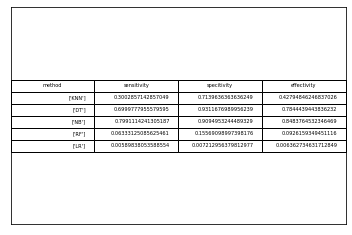

In [14]:
print(characteristic_table)
for j in range(1, 5):
    for i in range(1, 4):
        if(j == 1): 
            print('KNN: ', characteristic_table[j][i])
        if(j == 2): 
            print('DT: ', characteristic_table[j][i])
        if(j == 3): 
            print('NB: ', characteristic_table[j][i])
        if(j == 4): 
            print('RF: ', characteristic_table[j][i])
        if(j == 5): 
            print('RF: ', characteristic_table[j][i])
    print(' ')

fig, ax = plt.subplots()

# Hide axes
ax.xaxis.set_visible(False) 
ax.yaxis.set_visible(False)
# Table from Ed Smith answer
clust_data = characteristic_table
collabel=("method", "sensitivity", "specitivity", "effectivity")
ax.table(cellText=clust_data,colLabels=collabel,loc='center')


mustache box for every question 

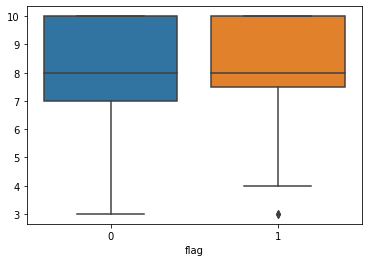

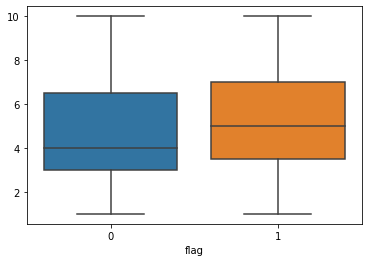

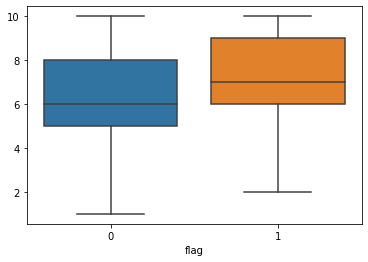

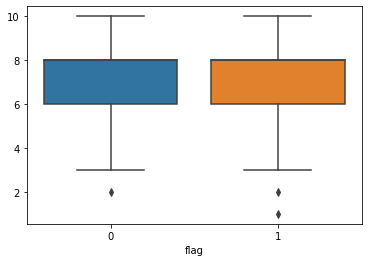

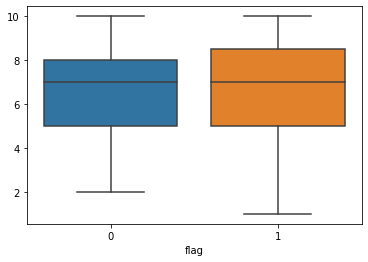

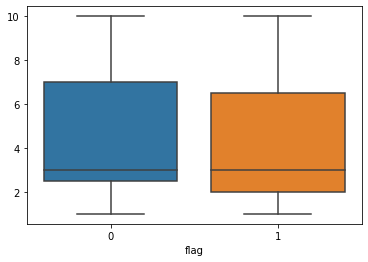

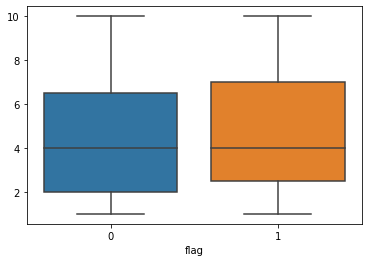

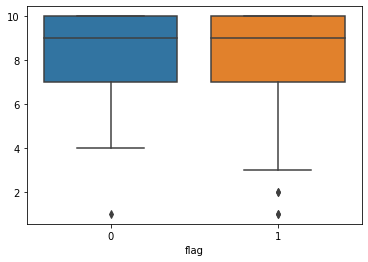

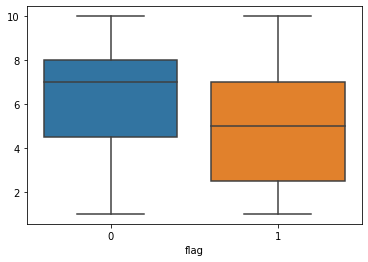

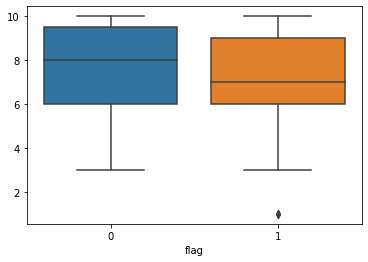

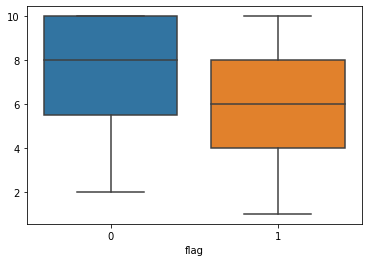

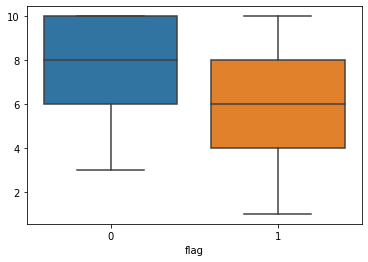

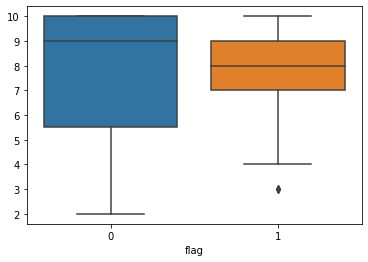

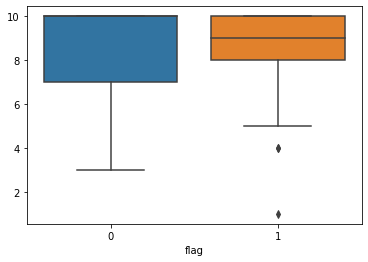

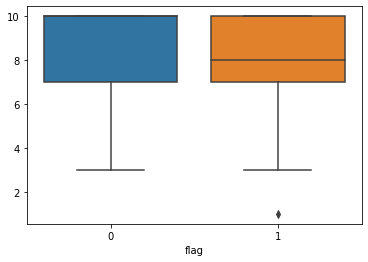

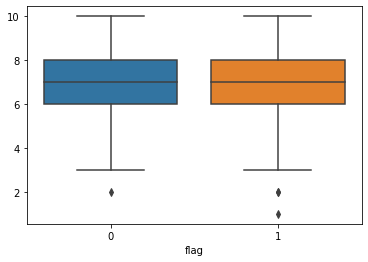

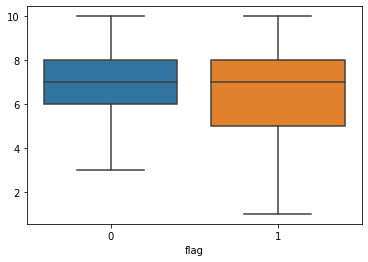

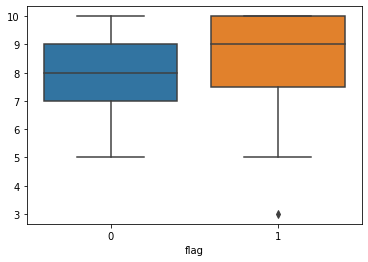

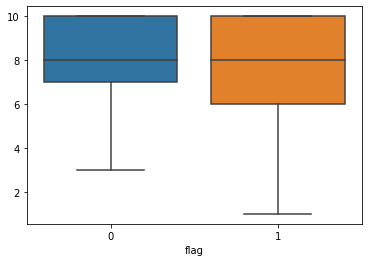

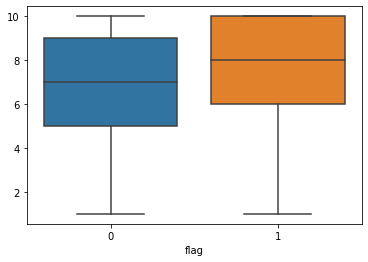

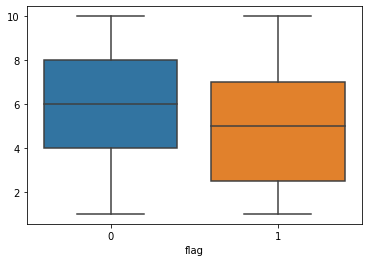

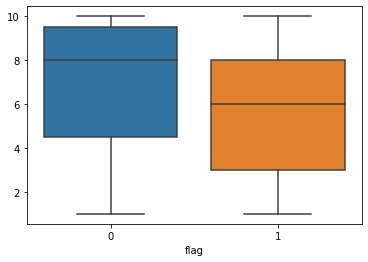

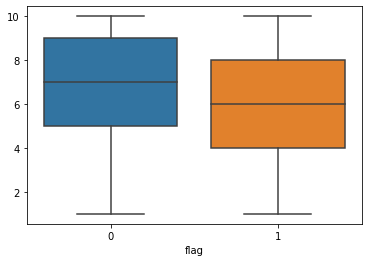

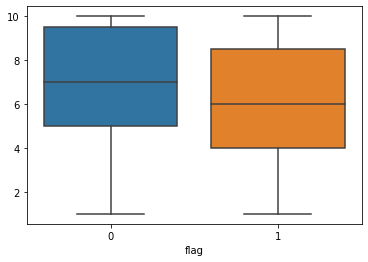

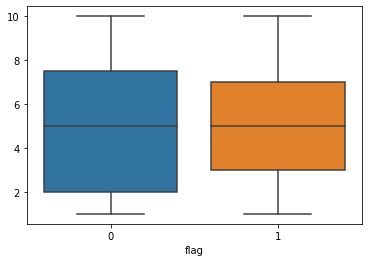

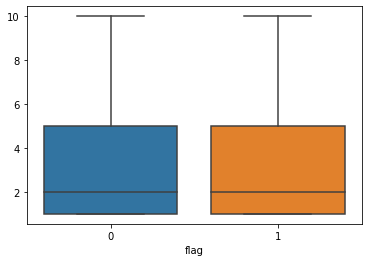

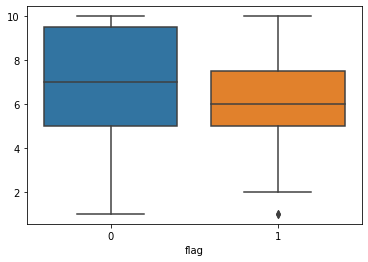

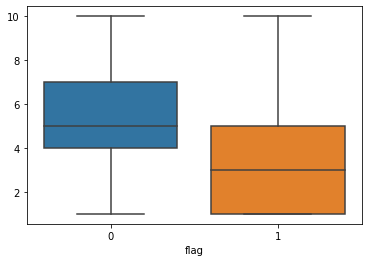

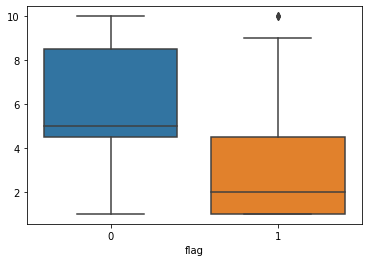

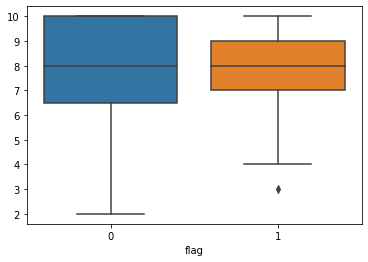

In [133]:
for i in range (0 , 30):
    ax = sns.boxplot(x=df.iloc[:, 34], y=every_question_base[i])
    plt.show()